In [1]:
import pyautogui
import time
import webbrowser
import pandas as pd
import bs4
import pyperclip
import numpy as np
import os
import re
import math
from datetime import datetime, timedelta


from urllib.parse import urlparse
#%% Windows simulation
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.actions.action_builder import ActionBuilder
from selenium.common.exceptions import NoSuchElementException



In [267]:
df_venture = pd.read_csv('../Data/ico_manully.csv')
df_venture

,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,Ended,When,...,ICO Order,Social,Funds and Investors,Investor Count,ICO Start,ICO End,Soft Cap,Hard Cap,ICO Raised,Other Link
0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,2023/10/30,2022/10/11,...,1,"{'Website': 'https://artyfact.game/', 'X (Ex-T...",NaN,0,2023/8/1,2023/10/30,660000.0,1320000.0,1320000,https://foundico.com/ico/artyfact.html
1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,2023/10/26,2023/10/25,...,1,"{'Website': 'https://supraoracles.com/', 'X (E...","['Coinbase Ventures', 'HashKey Capital', 'Anim...",22,2023/10/25,2023/10/26,NaN,2400000.0,2400000,https://common.fund/projects/supra-public-sale
2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,2023/10/9,2023/9/12,...,1,"{'Website': 'https://islamiccoin.net/', 'X (Ex...",NaN,0,2023/9/12,2023/10/9,NaN,4300000.0,2399474,NaN
3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,2023/9/27,2023/6/15,...,1,"['https://archway.io/', 'https://twitter.com/a...","['Blockchain Capital', 'Hashed Fund\nLead', 'C...",12,2023/6/15,2023/6/23,6000000.0,27000000.0,27000000,NaN
4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,2023/9/10,2023/8/28,...,2,{'Website': 'https://scapesmania.io/?utm_sourc...,NaN,0,2023/8/28,2023/9/10,NaN,720000.0,720000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,NaN,NaN,...,1,"{'Website': 'https://waves.tech/', 'X (Ex-Twit...",NaN,0,2016/4/11,2016/5/30,NaN,16000000.0,16000000,NaN
790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,NaN,NaN,...,1,"{'Website': 'https://www.wetrust.io/', 'X (Ex-...",NaN,0,NaN,NaN,NaN,NaN,0,NaN
791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,NaN,NaN,...,1,"['http://www.zengold.org/', 'https://zengold.o...",NaN,0,NaN,NaN,NaN,NaN,0,NaN
792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,NaN,NaN,...,1,"['http://zipper.io/', 'https://twitter.com/Zip...",NaN,0,NaN,NaN,NaN,NaN,0,NaN


In [268]:
df_venture['Success'] = df_venture['ICO Raised']>0
num = len(df_venture['ICO Raised'])
num_success = sum(df_venture['Success'])
num_nonsucc = sum(df_venture['ICO Raised']==0)

print(f'Total num: {num}; Success:{num_success}; Non-Success:{num_nonsucc}.')

num_soft = sum(~df_venture['Soft Cap'].isnull())
num_hard = sum(~df_venture['Hard Cap'].isnull())
num_reach = sum(df_venture['Hard Cap']<=df_venture['ICO Raised'])

print(f'Soft cap: {num_soft}, Hard cap: {num_hard}.Reach :{num_reach}')

Total num: 794; Success:579; Non-Success:215.
Soft cap: 24, Hard cap: 547.Reach :413


In [269]:
def date_clean(date_str):
     date_str = str(date_str)
     if len(date_str) == 0:
        return None
     try:
          
          return datetime.strptime(date_str, "%Y/%m/%d")
     except ValueError:
          
          return None
     
df_venture['ICO End'] = df_venture['ICO End'].apply(date_clean)
df_venture['ICO Start'] = df_venture['ICO Start'].apply(date_clean)
df_venture

,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,Ended,When,...,Social,Funds and Investors,Investor Count,ICO Start,ICO End,Soft Cap,Hard Cap,ICO Raised,Other Link,Success
0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,2023/10/30,2022/10/11,...,"{'Website': 'https://artyfact.game/', 'X (Ex-T...",NaN,0,2023-08-01,2023-10-30,660000.0,1320000.0,1320000,https://foundico.com/ico/artyfact.html,True
1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,2023/10/26,2023/10/25,...,"{'Website': 'https://supraoracles.com/', 'X (E...","['Coinbase Ventures', 'HashKey Capital', 'Anim...",22,2023-10-25,2023-10-26,NaN,2400000.0,2400000,https://common.fund/projects/supra-public-sale,True
2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,2023/10/9,2023/9/12,...,"{'Website': 'https://islamiccoin.net/', 'X (Ex...",NaN,0,2023-09-12,2023-10-09,NaN,4300000.0,2399474,NaN,True
3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,2023/9/27,2023/6/15,...,"['https://archway.io/', 'https://twitter.com/a...","['Blockchain Capital', 'Hashed Fund\nLead', 'C...",12,2023-06-15,2023-06-23,6000000.0,27000000.0,27000000,NaN,True
4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,2023/9/10,2023/8/28,...,{'Website': 'https://scapesmania.io/?utm_sourc...,NaN,0,2023-08-28,2023-09-10,NaN,720000.0,720000,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,NaN,NaN,...,"{'Website': 'https://waves.tech/', 'X (Ex-Twit...",NaN,0,2016-04-11,2016-05-30,NaN,16000000.0,16000000,NaN,True
790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,NaN,NaN,...,"{'Website': 'https://www.wetrust.io/', 'X (Ex-...",NaN,0,NaT,NaT,NaN,NaN,0,NaN,False
791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,NaN,NaN,...,"['http://www.zengold.org/', 'https://zengold.o...",NaN,0,NaT,NaT,NaN,NaN,0,NaN,False
792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,NaN,NaN,...,"['http://zipper.io/', 'https://twitter.com/Zip...",NaN,0,NaT,NaT,NaN,NaN,0,NaN,False


In [270]:
df_venture['ICO Days'] = df_venture['ICO End']-df_venture['ICO Start']+ timedelta(days=1)
col_name = df_venture.columns.tolist()[1:]
for c in col_name:
     n = sum(~df_venture[c].isnull())
     print(f"Label:{c},number:#{n}")


Label:Project,number:#794
Label:Abbr,number:#794
Label:Link,number:#794
Label:Sale Price,number:#781
Label:ROI,number:#748
Label:Total Raise,number:#581
Label:Launchpad,number:#104
Label:Ended,number:#599
Label:When,number:#599
Label:Funds,number:#257
Label:Type,number:#794
Label:Raise,number:#571
Label:Initial Cap,number:#119
Label:Market Cap,number:#707
Label:Blockchain,number:#674
Label:Category,number:#544
Label:Listing Date,number:#761
Label:ATH ROI,number:#748
Label:ICO Days,number:#715
Label:Rounds,number:#794
Label:ICO Order,number:#794
Label:Social,number:#794
Label:Funds and Investors,number:#257
Label:Investor Count,number:#794
Label:ICO Start,number:#715
Label:ICO End,number:#715
Label:Soft Cap,number:#24
Label:Hard Cap,number:#547
Label:ICO Raised,number:#794
Label:Other Link,number:#2
Label:Success,number:#794


In [52]:
df_investor = pd.read_csv('../Data/venture_table.csv')
df_investor

,Unnamed: 0,Name,Link,Tier,Type,Location,Portfolio,# Investments
0,0,Coinbase Ventures,https://cryptorank.io/funds/coinbase-ventures,1.0,Venture,United States,FTX TokenYuga LabsAmber Group,340
1,1,Andreessen Horowitz (a16z),https://cryptorank.io/funds/andreessen-horowitz,1.0,Venture,United States,RobinhoodForteCross River,210
2,2,Pantera Capital,https://cryptorank.io/funds/pantera-capital,1.0,Venture,United States,AlchemyBakktAmber Group,179
3,3,Polychain Capital,https://cryptorank.io/funds/polychain-capital,1.0,Venture,United States,SolanaCoinbaseCoinDCX,177
4,4,HashKey Capital,https://cryptorank.io/funds/hash-key-capital,1.0,Venture,Hong Kong,Secret NetworkCoinlistAssembly,165
...,...,...,...,...,...,...,...,...
8910,8910,Zett.eth,https://cryptorank.io/funds/zett-eth,NaN,Angel Investor,Sweden,DoinGud,1
8911,8911,Zhixian,https://cryptorank.io/funds/zhixian,NaN,Angel Investor,NaN,DeSchool,1
8912,8912,Zhu Deming,https://cryptorank.io/funds/zhudeming,NaN,Angel Investor,NaN,Rivermen,1
8913,8913,ZLOY,https://cryptorank.io/funds/zloy,NaN,Angel Investor,NaN,RareRound,1


In [271]:

col_name = df_investor.columns.tolist()[1:]
for c in col_name:
     n = sum(~df_investor[c].isnull())
     print(f"Label:{c},number:#{n}")

Label:Name,number:#8915
Label:Link,number:#8915
Label:Tier,number:#5434
Label:Type,number:#8915
Label:Location,number:#5794
Label:Portfolio,number:#8915
Label:# Investments,number:#8915


In [466]:
import ast
def github_find(txt):
     if txt[0]=='{':
          link_dict = ast.literal_eval(txt)
          #print(link_dict)
          github = link_dict.get('GitHub')
     else:
          for t in ast.literal_eval(txt):
               if 'github'in t:
                    github = t
               else:
                    github = None
     return github
def twitter_find(txt):
     if txt[0]=='{':
          link_dict = ast.literal_eval(txt)
          #print(link_dict)
          github = link_dict.get('X (Ex-Twitter)')
     else:
          for t in ast.literal_eval(txt):
               if 'twitter'in t:
                    github = t
               else:
                    github = None
     return github
def social_media(txt):
     if txt[0]=='{':
          link_dict = ast.literal_eval(txt)
          #print(link_dict)
          cnt = len(link_dict)
     else:
          link_dict = ast.literal_eval(txt)
          #print(link_dict)
          cnt = len(link_dict)
     return cnt
          

In [469]:
from collections import Counter
df_venture['github'] = df_venture['Social'].apply(github_find)
df_venture['code_available'] = ~df_venture['github'].isnull()
df_venture['twitter'] = df_venture['Social'].apply(twitter_find)
df_venture['is_twitter'] = ~df_venture['twitter'].isnull()
df_venture['social_media'] = df_venture['Social'].apply(social_media)
print(df_venture['social_media'])
num_code = sum(df_venture['code_available'])
num_code_none = sum(df_venture['code_available']==0)

print(f'Code available:{num_code}; Non-available:{num_code_none}.')
print(f"ICO Order: {Counter(df_venture['ICO Order'])}")
print(f"Category: {Counter(df_venture['Category'])}")
df_venture['is_Ethereum'] = df_venture['Blockchain'].str.contains('Ethereum')

print(f"Ehthereum: {sum(df_venture['is_Ethereum'].dropna())}, Other:{sum((df_venture['is_Ethereum']==0).dropna())}")
df_venture

0       8
1       6
2       7
3       5
4       7
       ..
789     8
790    10
791     5
792     5
793     6
Name: social_media, Length: 794, dtype: int64
Code available:479; Non-available:315.
ICO Order: Counter({1: 728, 2: 39, 3: 16, 4: 9, 5: 1, 7: 1})
Category: Counter({nan: 250, 'Blockchain Service': 175, 'DeFi': 88, 'Chain': 78, 'Blockchain Infrastructure': 73, 'GameFi': 39, 'CeFi': 32, 'Social': 31, 'Currency': 21, 'NFT': 7})
Ehthereum: 541, Other:133


,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,Ended,When,...,code_available,social_media,is_Ethereum,expert,is_hardcap,is_softcap,is_investor,after18,twitter,is_twitter
0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,2023/10/30,2022/10/11,...,False,8,False,0,True,True,False,True,https://twitter.com/artyfact_game,True
1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,2023/10/26,2023/10/25,...,False,6,NaN,[1602],True,False,True,True,https://twitter.com/SupraOracles?s=20,True
2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,2023/10/9,2023/9/12,...,False,7,NaN,0,True,False,False,True,https://twitter.com/Islamic_coin,True
3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,2023/9/27,2023/6/15,...,True,5,NaN,[708],True,True,True,True,None,False
4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,2023/9/10,2023/8/28,...,False,7,False,0,True,False,False,True,https://twitter.com/ScapesMania,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,NaN,NaN,...,True,8,True,0,True,False,False,False,https://twitter.com/wavesprotocol,True
790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,NaN,NaN,...,True,10,True,0,False,False,False,False,https://twitter.com/wetrustplatform,True
791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,NaN,NaN,...,False,5,False,0,False,False,False,False,None,False
792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,NaN,NaN,...,False,5,True,0,False,False,False,False,None,False


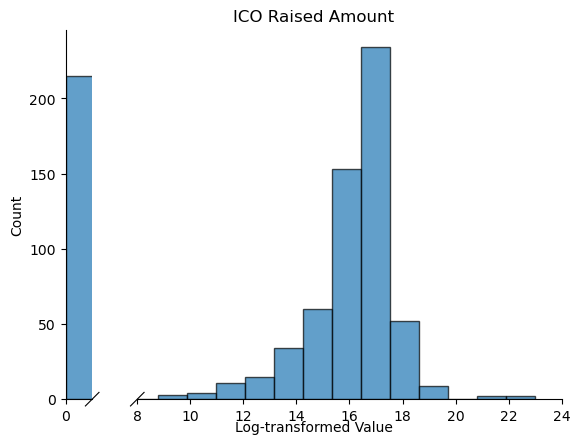

In [133]:

    
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# 创建直方图
bax = brokenaxes(xlims=((0, 1), (8, 24)), hspace=0.05)
data = np.log(1 + df_venture['ICO Raised'])
bins = np.linspace(data.min(), data.max(), 22)
bax.hist(data, bins=bins, edgecolor='black', alpha=0.7)

# 添加标签和标题
bax.set_xlabel('Log-transformed Value')
bax.set_ylabel('Count')
bax.set_title('ICO Raised Amount')

# 设置刻度
#plt.set_xticks([0, 1, 8, 24])

# 显示图形
plt.show()

In [528]:
np.exp(17)

24154952.7535753

3.999991999914312e-06 4.060443010546419


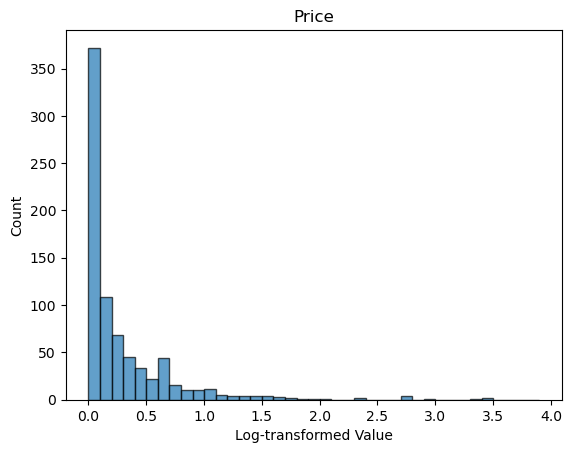

In [535]:

bins = [i/10 for i in range(0,40,1)]

data = np.log(1+df_venture['Sale Price'])
print(min(data),max(data))
# 创建直方图
plt.hist(data, bins=bins, edgecolor='black',alpha= 0.7)


# 添加标签和标题
plt.xlabel('Log-transformed Value')
plt.ylabel('Count')
plt.title('Price')

# 显示图形
plt.show()

[2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, nan] 
 [10, 29, 58, 41, 26, 313, 227, 7, 3, 1, 79]


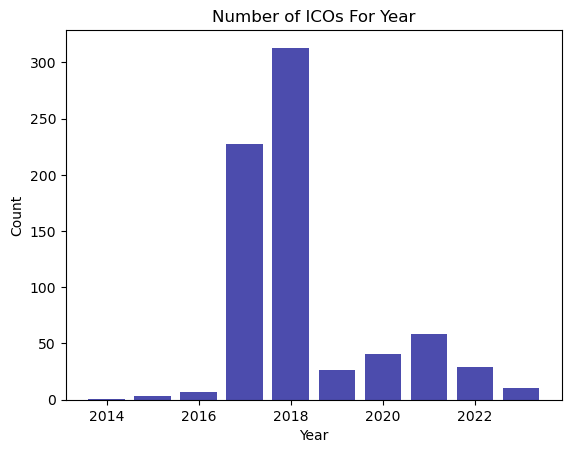

In [527]:
year_list = [day.year for day in df_venture['ICO Start'].tolist()]
year_counts = Counter(year_list)


# 提取年份和计数
years = list(year_counts.keys())
counts = list(year_counts.values())
print(years,'\n',counts)
# 创建柱状图
plt.bar(years, counts, color='darkblue', alpha=0.7)

# 添加标签和标题
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of ICOs For Year')

# 显示图形
plt.show()

1.0 366.0


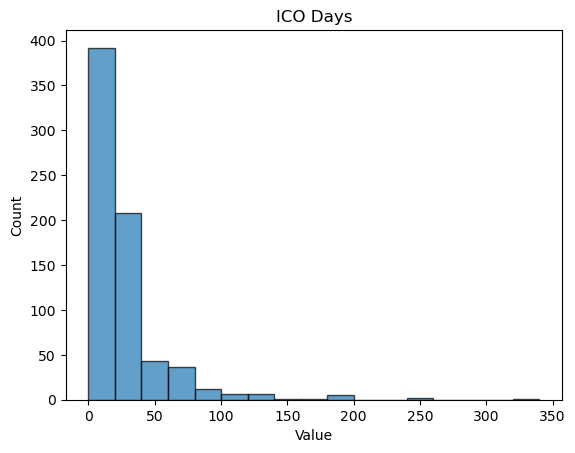

In [275]:
data = df_venture['ICO Days'].dt.days

print(min(data),max(data))
# 创建直方图
bins = range(0,360,20)
plt.hist(data, bins=bins, edgecolor='black',alpha= 0.7)


# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('ICO Days')

# 显示图形
plt.show()

In [182]:
bins = [0, 1,5,10,20, 30,40, 60, 100, 200,360]
Counter(pd.cut(df_venture['ICO Days'].dt.days, bins=bins))


Counter({Interval(0.0, 1.0, closed='right'): 137,
         Interval(1.0, 5.0, closed='right'): 130,
         Interval(30.0, 40.0, closed='right'): 109,
         Interval(20.0, 30.0, closed='right'): 92,
         nan: 83,
         Interval(10.0, 20.0, closed='right'): 77,
         Interval(5.0, 10.0, closed='right'): 55,
         Interval(60.0, 100.0, closed='right'): 47,
         Interval(40.0, 60.0, closed='right'): 42,
         Interval(100.0, 200.0, closed='right'): 19,
         Interval(200.0, 360.0, closed='right'): 3})

In [277]:
def investors_clean(txt):
     if pd.isnull(txt):
          return None
     else:
          txt = re.sub(r'\\nLead','',txt)
          return ast.literal_eval(txt)
df_venture['Funds and Investors'] = df_venture['Funds and Investors'].apply(investors_clean)#


In [278]:
def expert_index(lst):
    #lst = df_venture['Funds and Investors']
    
    index = 0
    if lst==None:
        return 0
    for item in lst:
        if df_investor['# Investments'].loc[df_investor['Name'] == item].values:
            index += df_investor['# Investments'].loc[df_investor['Name'] == item].values
        else:
            index = index
        #print(index)
    return index

In [236]:
# lst = df_venture['Funds and Investors'][1]

# index = 0
# for item in lst:
#      if df_investor['# Investments'].loc[df_investor['Name'] == item].values:
#           index += df_investor['# Investments'].loc[df_investor['Name'] == item].values
#      else:
#           index = index
#      print(index)

In [413]:
#df_venture['expert'] = df_venture['Funds and Investors'].apply(expert_index)
#df_venture['ICO Days'] = df_venture['ICO Days'].dt.days
df_venture['is_hardcap'] = df_venture['Hard Cap']>0
df_venture['is_softcap'] = df_venture['Soft Cap']>0
df_venture['is_investor'] = df_venture['Investor Count']>0
df_venture ['after18'] = df_venture['ICO Start'].apply(lambda x:(x.year))>2018
df_venture


,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,Ended,When,...,Success,github,code_available,social_media,is_Ethereum,expert,is_hardcap,is_softcap,is_investor,after18
0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,2023/10/30,2022/10/11,...,True,None,False,8,False,0,True,True,False,True
1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,2023/10/26,2023/10/25,...,True,None,False,6,NaN,[1602],True,False,True,True
2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,2023/10/9,2023/9/12,...,True,None,False,7,NaN,0,True,False,False,True
3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,2023/9/27,2023/6/15,...,True,https://github.com/archway-network,True,5,NaN,[708],True,True,True,True
4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,2023/9/10,2023/8/28,...,True,None,False,7,False,0,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,NaN,NaN,...,True,https://github.com/wavesplatform/,True,8,True,0,True,False,False,False
790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,NaN,NaN,...,False,https://github.com/WeTrustPlatform,True,10,True,0,False,False,False,False
791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,NaN,NaN,...,False,None,False,5,False,0,False,False,False,False
792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,NaN,NaN,...,False,None,False,5,True,0,False,False,False,False


In [262]:
def get_model_df(lst):
     df = df_venture[lst]
     for column in lst:
          df = df.loc[~df[column].isna(),]
     return df


     

In [372]:
df_venture.columns

Index(['Unnamed: 0', 'Project', 'Abbr', 'Link', 'Sale Price', 'ROI',
       'Total Raise', 'Launchpad', 'Ended', 'When', 'Funds', 'Type', 'Raise',
       'Initial Cap', 'Market Cap', 'Blockchain', 'Category', 'Listing Date',
       'ATH ROI', 'ICO Days', 'Rounds', 'ICO Order', 'Social',
       'Funds and Investors', 'Investor Count', 'ICO Start', 'ICO End',
       'Soft Cap', 'Hard Cap', 'ICO Raised', 'Other Link', 'Success', 'github',
       'code_available', 'social_media', 'is_Ethereum', 'expert', 'is_hardcap',
       'is_softcap'],
      dtype='object')

In [374]:
import statsmodels.api as sm
var_list1 =  ['Success', 'ICO Order', 'expert','Investor Count','ICO Days', 'code_available', 'Sale Price',  'social_media','is_Ethereum','is_hardcap','is_softcap']
df_model1 = get_model_df(var_list1)
df_model1['expert'] = df_model1['expert'].apply(int)
df_model1['code_available'] = df_model1['code_available'].apply(int)
df_model1['is_Ethereum'] = df_model1['is_Ethereum'].apply(int)
df_model1['is_hardcap'] = df_model1['is_hardcap'].apply(int)
df_model1['is_softcap'] = df_model1['is_softcap'].apply(int)
df_model1.corr()


,Success,ICO Order,expert,Investor Count,ICO Days,code_available,Sale Price,social_media,is_Ethereum,is_hardcap,is_softcap
Success,1.000000,0.060244,0.162445,0.157815,-0.242195,0.042821,0.041845,0.085093,-0.175710,0.740515,0.046441
ICO Order,0.060244,1.000000,0.258181,0.271791,-0.040518,-0.170302,0.021028,-0.078950,-0.297510,0.124272,-0.037149
expert,0.162445,0.258181,1.000000,0.926166,-0.144714,-0.083222,0.021637,-0.005864,-0.283162,0.156851,-0.033268
Investor Count,0.157815,0.271791,0.926166,1.000000,-0.114529,-0.108995,0.014506,0.006750,-0.239351,0.157518,-0.032470
ICO Days,-0.242195,-0.040518,-0.144714,-0.114529,1.000000,-0.004362,-0.018166,-0.036667,0.067469,-0.213092,0.127765
code_available,0.042821,-0.170302,-0.083222,-0.108995,-0.004362,1.000000,-0.062239,0.367649,0.075680,-0.006208,0.005184
Sale Price,0.041845,0.021028,0.021637,0.014506,-0.018166,-0.062239,1.000000,-0.027141,-0.056353,0.018522,-0.023676
social_media,0.085093,-0.078950,-0.005864,0.006750,-0.036667,0.367649,-0.027141,1.000000,-0.021658,0.059749,0.026978
is_Ethereum,-0.175710,-0.297510,-0.283162,-0.239351,0.067469,0.075680,-0.056353,-0.021658,1.000000,-0.187253,0.032713
is_hardcap,0.740515,0.124272,0.156851,0.157518,-0.213092,-0.006208,0.018522,0.059749,-0.187253,1.000000,-0.243310


In [471]:
# Assuming df is your DataFrame

var_list1 =  ['Success', 'ICO Order','Sale Price','code_available','is_softcap','is_twitter']
df_model1 = get_model_df(var_list1)
#df_model1['expert'] = df_model1['expert'].apply(int)
df_model1['code_available'] = df_model1['code_available'].apply(int)
df_model1['is_twitter'] = df_model1['is_twitter'].apply(int)
#df_model1['is_Ethereum'] = df_model1['is_Ethereum'].apply(int)
df_model1['Sale Price'] = df_model1['Sale Price'].apply(int)#.apply(lambda x:np.log(x+1))
#df_model1['ICO Days'] = df_model1['ICO Days'].apply(np.log)
df_model1['is_softcap'] = df_model1['is_softcap'].apply(int)
#df_model1['is_investor'] = df_model1['is_investor'].apply(int)
#df_model1['after18'] = df_model1['after18'].apply(int)
print(df_model1.corr())
X = df_model1[['ICO Order','Sale Price','code_available','is_softcap','is_twitter']]# 'Investor Count', 'expert'
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model1['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())

                 Success  ICO Order  Sale Price  code_available  is_softcap  \
Success         1.000000   0.107889    0.028694        0.052870    0.073308   
ICO Order       0.107889   1.000000    0.016052       -0.115932   -0.030968   
Sale Price      0.028694   0.016052    1.000000       -0.051181   -0.021045   
code_available  0.052870  -0.115932   -0.051181        1.000000    0.006130   
is_softcap      0.073308  -0.030968   -0.021045        0.006130    1.000000   
is_twitter      0.199919  -0.031628    0.000494        0.269740    0.045086   

                is_twitter  
Success           0.199919  
ICO Order        -0.031628  
Sale Price        0.000494  
code_available    0.269740  
is_softcap        0.045086  
is_twitter        1.000000  
Optimization terminated successfully.
         Current function value: 0.546160
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:     

In [475]:
# Assuming df is your DataFrame

var_list1 =  ['Success', 'is_investor','Sale Price','code_available','is_softcap','is_twitter']
df_model1 = get_model_df(var_list1)
#df_model1['expert'] = df_model1['expert'].apply(int)
df_model1['code_available'] = df_model1['code_available'].apply(int)
df_model1['is_twitter'] = df_model1['is_twitter'].apply(int)
#df_model1['is_Ethereum'] = df_model1['is_Ethereum'].apply(int)
df_model1['Sale Price'] = df_model1['Sale Price'].apply(int)#.apply(lambda x:np.log(x+1))
#df_model1['ICO Days'] = df_model1['ICO Days'].apply(np.log)
df_model1['is_softcap'] = df_model1['is_softcap'].apply(int)
df_model1['is_investor'] = df_model1['is_investor'].apply(int)
#df_model1['after18'] = df_model1['after18'].apply(int)
print(df_model1.corr())
X = df_model1[['is_investor','Sale Price','code_available','is_softcap','is_twitter']]# 'Investor Count', 'expert'
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model1['Success']

print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())

                 Success  is_investor  Sale Price  code_available  is_softcap  \
Success         1.000000     0.305438    0.028694        0.052870    0.073308   
is_investor     0.305438     1.000000    0.008064       -0.081084   -0.028592   
Sale Price      0.028694     0.008064    1.000000       -0.051181   -0.021045   
code_available  0.052870    -0.081084   -0.051181        1.000000    0.006130   
is_softcap      0.073308    -0.028592   -0.021045        0.006130    1.000000   
is_twitter      0.199919     0.080464    0.000494        0.269740    0.045086   

                is_twitter  
Success           0.199919  
is_investor       0.080464  
Sale Price        0.000494  
code_available    0.269740  
is_softcap        0.045086  
is_twitter        1.000000  
574
Optimization terminated successfully.
         Current function value: 0.502736
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Success   No. 

In [476]:
# Assuming df is your DataFrame

var_list1 =  ['Success', 'Investor Count','Sale Price','code_available','is_softcap','is_twitter']
df_model1 = get_model_df(var_list1)
#df_model1['expert'] = df_model1['expert'].apply(int)
df_model1['code_available'] = df_model1['code_available'].apply(int)
df_model1['is_twitter'] = df_model1['is_twitter'].apply(int)
#df_model1['is_Ethereum'] = df_model1['is_Ethereum'].apply(int)
df_model1['Sale Price'] = df_model1['Sale Price'].apply(int)#.apply(lambda x:np.log(x+1))
#df_model1['ICO Days'] = df_model1['ICO Days'].apply(np.log)
df_model1['is_softcap'] = df_model1['is_softcap'].apply(int)
print(df_model1.corr())
X = df_model1[['Investor Count','Sale Price','code_available','is_softcap','is_twitter']]# 'Investor Count', 'expert'
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model1['Success']

print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())

                 Success  Investor Count  Sale Price  code_available  \
Success         1.000000        0.216755    0.028694        0.052870   
Investor Count  0.216755        1.000000   -0.009569       -0.056222   
Sale Price      0.028694       -0.009569    1.000000       -0.051181   
code_available  0.052870       -0.056222   -0.051181        1.000000   
is_softcap      0.073308       -0.018168   -0.021045        0.006130   
is_twitter      0.199919        0.044542    0.000494        0.269740   

                is_softcap  is_twitter  
Success           0.073308    0.199919  
Investor Count   -0.018168    0.044542  
Sale Price       -0.021045    0.000494  
code_available    0.006130    0.269740  
is_softcap        1.000000    0.045086  
is_twitter        0.045086    1.000000  
574
Optimization terminated successfully.
         Current function value: 0.508623
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         

In [477]:
# Assuming df is your DataFrame

var_list1 =  ['Success',  'expert','Sale Price','code_available','is_softcap','is_twitter']
df_model1 = get_model_df(var_list1)
df_model1['expert'] = df_model1['expert'].apply(int)
df_model1['code_available'] = df_model1['code_available'].apply(int)
df_model1['is_twitter'] = df_model1['is_twitter'].apply(int)
#df_model1['is_Ethereum'] = df_model1['is_Ethereum'].apply(int)
df_model1['Sale Price'] = df_model1['Sale Price'].apply(int)#.apply(lambda x:np.log(x+1))
#df_model1['ICO Days'] = df_model1['ICO Days'].apply(np.log)
df_model1['is_softcap'] = df_model1['is_softcap'].apply(int)
print(df_model1.corr())
X = df_model1[[ 'expert','Sale Price','code_available','is_softcap','is_twitter']]# 'Investor Count', 'expert'
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model1['Success']

print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())

                 Success    expert  Sale Price  code_available  is_softcap  \
Success         1.000000  0.220670    0.028694        0.052870    0.073308   
expert          0.220670  1.000000   -0.004709       -0.033701   -0.020005   
Sale Price      0.028694 -0.004709    1.000000       -0.051181   -0.021045   
code_available  0.052870 -0.033701   -0.051181        1.000000    0.006130   
is_softcap      0.073308 -0.020005   -0.021045        0.006130    1.000000   
is_twitter      0.199919  0.053948    0.000494        0.269740    0.045086   

                is_twitter  
Success           0.199919  
expert            0.053948  
Sale Price        0.000494  
code_available    0.269740  
is_softcap        0.045086  
is_twitter        1.000000  
574
Optimization terminated successfully.
         Current function value: 0.509055
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:        

In [504]:
# Assuming df is your DataFrame

var_list2 =  ['ICO Raised', 'ICO Order', 'code_available', 'Sale Price','is_twitter','is_hardcap','is_Ethereum']
df_model2 = get_model_df(var_list2)
#df_model2 = df_model2[df_model2['ICO Raised']>0]
#df_model2['expert'] = df_model2['expert'].apply(int)
df_model2['is_twitter'] = df_model2['is_twitter'].apply(int)
df_model2['code_available'] = df_model2['code_available'].apply(int)
df_model2['is_hardcap'] = df_model2['is_hardcap'].apply(int)
df_model2['is_Ethereum'] = df_model2['is_Ethereum'].apply(int)
print(df_model2.corr())
X = df_model2[[ 'ICO Order',  'code_available', 'Sale Price','is_twitter','is_hardcap','is_Ethereum']]# 'Investor Count', 'expert'
X = sm.add_constant(X)  # Add a constant term to the independent variables
df_model2['log_ICO_Raised'] = np.log(df_model2['ICO Raised']+1)
y = df_model2['log_ICO_Raised']


# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())

                ICO Raised  ICO Order  code_available  Sale Price  is_twitter  \
ICO Raised        1.000000  -0.023302        0.033731    0.021862    0.017674   
ICO Order        -0.023302   1.000000       -0.162145    0.022392   -0.074890   
code_available    0.033731  -0.162145        1.000000   -0.063599    0.266356   
Sale Price        0.021862   0.022392       -0.063599    1.000000   -0.001718   
is_twitter        0.017674  -0.074890        0.266356   -0.001718    1.000000   
is_hardcap       -0.034717   0.143705        0.002509    0.025524    0.036892   
is_Ethereum      -0.007646  -0.282933        0.102370   -0.059092    0.015567   

                is_hardcap  is_Ethereum  
ICO Raised       -0.034717    -0.007646  
ICO Order         0.143705    -0.282933  
code_available    0.002509     0.102370  
Sale Price        0.025524    -0.059092  
is_twitter        0.036892     0.015567  
is_hardcap        1.000000    -0.151059  
is_Ethereum      -0.151059     1.000000  
               

In [509]:
# Assuming df is your DataFrame

var_list2 =  ['ICO Raised', 'Investor Count', 'code_available', 'Sale Price','is_twitter','is_hardcap','is_Ethereum']
df_model2 = get_model_df(var_list2)
#df_model2 = df_model2[df_model2['ICO Raised']>0]
#df_model2['expert'] = df_model2['expert'].apply(int)
df_model2['is_twitter'] = df_model2['is_twitter'].apply(int)
df_model2['code_available'] = df_model2['code_available'].apply(int)
df_model2['is_hardcap'] = df_model2['is_hardcap'].apply(int)
df_model2['is_Ethereum'] = df_model2['is_Ethereum'].apply(int)
#df_model2['is_investor'] = df_model2['is_investor'].apply(int)
print(df_model2.corr())
X = df_model2[[ 'Investor Count', 'code_available', 'Sale Price','is_twitter','is_hardcap','is_Ethereum']]# 'Investor Count', 'expert'
X = sm.add_constant(X)  # Add a constant term to the independent variables
df_model2['log_ICO_Raised'] = np.log(df_model2['ICO Raised']+1)
y = df_model2['log_ICO_Raised']


# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())

                ICO Raised  Investor Count  code_available  Sale Price  \
ICO Raised        1.000000       -0.009212        0.033731    0.021862   
Investor Count   -0.009212        1.000000       -0.101879    0.015944   
code_available    0.033731       -0.101879        1.000000   -0.063599   
Sale Price        0.021862        0.015944       -0.063599    1.000000   
is_twitter        0.017674        0.005508        0.266356   -0.001718   
is_hardcap       -0.034717        0.184896        0.002509    0.025524   
is_Ethereum      -0.007646       -0.229022        0.102370   -0.059092   

                is_twitter  is_hardcap  is_Ethereum  
ICO Raised        0.017674   -0.034717    -0.007646  
Investor Count    0.005508    0.184896    -0.229022  
code_available    0.266356    0.002509     0.102370  
Sale Price       -0.001718    0.025524    -0.059092  
is_twitter        1.000000    0.036892     0.015567  
is_hardcap        0.036892    1.000000    -0.151059  
is_Ethereum       0.015567   

In [526]:
# Assuming df is your DataFrame

var_list2 =  ['ICO Raised', 'expert', 'code_available', 'Sale Price','is_twitter','is_hardcap','is_Ethereum']
df_model2 = get_model_df(var_list2)
#df_model2 = df_model2[df_model2['ICO Raised']>0]
df_model2['expert'] = df_model2['expert'].apply(int)
df_model2['is_twitter'] = df_model2['is_twitter'].apply(int)
df_model2['code_available'] = df_model2['code_available'].apply(int)
df_model2['is_hardcap'] = df_model2['is_hardcap'].apply(int)
df_model2['is_Ethereum'] = df_model2['is_Ethereum'].apply(int)
#df_model2['is_investor'] = df_model2['is_investor'].apply(int)
print(df_model2.corr())
X = df_model2[[ 'expert', 'code_available', 'Sale Price','is_twitter','is_hardcap','is_Ethereum']]# 'Investor Count', 'expert'
X = sm.add_constant(X)  # Add a constant term to the independent variables
df_model2['log_ICO_Raised'] = np.log(df_model2['ICO Raised']+1)
y = df_model2['log_ICO_Raised']


# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())

                ICO Raised    expert  code_available  Sale Price  is_twitter  \
ICO Raised        1.000000 -0.005416        0.033731    0.021862    0.017674   
expert           -0.005416  1.000000       -0.077454    0.023149    0.016552   
code_available    0.033731 -0.077454        1.000000   -0.063599    0.266356   
Sale Price        0.021862  0.023149       -0.063599    1.000000   -0.001718   
is_twitter        0.017674  0.016552        0.266356   -0.001718    1.000000   
is_hardcap       -0.034717  0.185520        0.002509    0.025524    0.036892   
is_Ethereum      -0.007646 -0.270240        0.102370   -0.059092    0.015567   

                is_hardcap  is_Ethereum  
ICO Raised       -0.034717    -0.007646  
expert            0.185520    -0.270240  
code_available    0.002509     0.102370  
Sale Price        0.025524    -0.059092  
is_twitter        0.036892     0.015567  
is_hardcap        1.000000    -0.151059  
is_Ethereum      -0.151059     1.000000  
                       

In [503]:
# Assuming df is your DataFrame

var_list2 =  ['ICO Raised', 'Investor Count', 'code_available', 'Sale Price','is_twitter','is_hardcap','is_Ethereum']
df_model2 = get_model_df(var_list2)
#df_model2 = df_model2[df_model2['ICO Raised']>0]
#df_model2['expert'] = df_model2['expert'].apply(int)
df_model2['is_twitter'] = df_model2['is_twitter'].apply(int)
df_model2['code_available'] = df_model2['code_available'].apply(int)
df_model2['is_hardcap'] = df_model2['is_hardcap'].apply(int)
df_model2['is_Ethereum'] = df_model2['is_Ethereum'].apply(int)
print(df_model2.corr())
X = df_model2[[ 'Investor Count', 'code_available', 'Sale Price','is_twitter','is_hardcap','is_Ethereum']]# 'Investor Count', 'expert'
X = sm.add_constant(X)  # Add a constant term to the independent variables
df_model2['log_ICO_Raised'] = np.log(df_model2['ICO Raised']+1)
y = df_model2['log_ICO_Raised']


# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())

                ICO Raised  Investor Count  code_available  Sale Price  \
ICO Raised        1.000000        0.001414        0.002702    0.044504   
Investor Count    0.001414        1.000000       -0.124256    0.013746   
code_available    0.002702       -0.124256        1.000000   -0.052474   
Sale Price        0.044504        0.013746       -0.052474    1.000000   
is_twitter       -0.013692       -0.024490        0.253239    0.029891   
Hard Cap          0.998145       -0.006268        0.008062    0.047585   
is_Ethereum      -0.053611       -0.199719        0.091630   -0.065255   

                is_twitter  Hard Cap  is_Ethereum  
ICO Raised       -0.013692  0.998145    -0.053611  
Investor Count   -0.024490 -0.006268    -0.199719  
code_available    0.253239  0.008062     0.091630  
Sale Price        0.029891  0.047585    -0.065255  
is_twitter        1.000000 -0.015474     0.021274  
Hard Cap         -0.015474  1.000000    -0.047784  
is_Ethereum       0.021274 -0.047784     1.

In [500]:
import statsmodels.api as sm
## Model two: for raised amount


var_list2 =  ['ICO Raised', 'ICO Order', 'Investor Count', 'expert','Rounds','ICO Days', 'code_available', 'Sale Price', 'is_Ethereum', 'social_media']
df_model2 = get_model_df(var_list2)

# Assuming df is your DataFrame with relevant columns
# 'Success', 'ICO Order', 'Investor Count', 'expert', 'ICO Days', 'code_available', 'Sale Price', 'is_Ethereum', 'social_media'

# Create a constant term to represent the intercept
df_model2['const'] = 1
df_model2['code_available'] = df_model2['code_available'].apply(int)
df_model2['is_Ethereum'] = df_model2['is_Ethereum'].apply(int)
df_model2['expert'] = df_model2['expert'].apply(int)
#df_model2 = df_model2.loc[df_model2['ICO Raised']>0]

# Define independent variables
independent_vars = [ 'ICO Order', 'expert','ICO Days', 'code_available', 'Sale Price', 'is_Ethereum', 'social_media', 'const']

# Select the columns for the model
X = df_model2[independent_vars]

# Dependent variable
y = df_model2['ICO Raised']

#print(df_model1)
# Fit the regression model
model2 = sm.OLS(np.log(1+y), X).fit()

# Print the regression results
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             ICO Raised   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     8.097
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.95e-09
Time:                        12:07:11   Log-Likelihood:                -1982.4
No. Observations:                 616   AIC:                             3981.
Df Residuals:                     608   BIC:                             4016.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
ICO Order         -0.9976      0.519     -1.

In [290]:
import statsmodels.api as sm
## Model one-1: for success

var_list1 =  ['Success', 'ICO Order', 'Investor Count', 'expert','ICO Days', 'code_available', 'Sale Price', 'is_Ethereum', 'social_media','Hard Cap']
df_model11 = get_model_df(var_list1)

# Assuming df is your DataFrame with relevant columns
# 'Success', 'ICO Order', 'Investor Count', 'expert', 'ICO Days', 'code_available', 'Sale Price', 'is_Ethereum', 'social_media'

# Create a constant term to represent the intercept
df_model11['const'] = 1
df_model11['Success'] = df_model1['Success'].apply(int)
df_model11['code_available'] = df_model1['code_available'].apply(int)
df_model11['is_Ethereum'] = df_model1['is_Ethereum'].apply(int)
df_model11['expert'] = df_model1['expert'].apply(int)

# Define independent variables
independent_vars = ['ICO Order', 'Investor Count', 'expert',  'code_available', 'Sale Price', 'social_media','Hard Cap', 'const']

# Select the columns for the model
X = df_model11[independent_vars]

# Dependent variable
y = df_model11['Success']

#print(df_model1)
# Fit the regression model
model11 = sm.OLS(y, X).fit()

# Print the regression results
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:                Success   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.245
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.276
Time:                        03:45:35   Log-Likelihood:                 212.86
No. Observations:                 478   AIC:                            -409.7
Df Residuals:                     470   BIC:                            -376.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
ICO Order         -0.0339      0.013     -2.

In [531]:
df_venture.to_csv('../Data/ico_manully.csv')

In [532]:
df_venture

,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,Ended,When,...,code_available,social_media,is_Ethereum,expert,is_hardcap,is_softcap,is_investor,after18,twitter,is_twitter
0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,2023/10/30,2022/10/11,...,False,8,False,0,True,True,False,True,https://twitter.com/artyfact_game,True
1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,2023/10/26,2023/10/25,...,False,6,NaN,[1602],True,False,True,True,https://twitter.com/SupraOracles?s=20,True
2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,2023/10/9,2023/9/12,...,False,7,NaN,0,True,False,False,True,https://twitter.com/Islamic_coin,True
3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,2023/9/27,2023/6/15,...,True,5,NaN,[708],True,True,True,True,None,False
4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,2023/9/10,2023/8/28,...,False,7,False,0,True,False,False,True,https://twitter.com/ScapesMania,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,NaN,NaN,...,True,8,True,0,True,False,False,False,https://twitter.com/wavesprotocol,True
790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,NaN,NaN,...,True,10,True,0,False,False,False,False,https://twitter.com/wetrustplatform,True
791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,NaN,NaN,...,False,5,False,0,False,False,False,False,None,False
792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,NaN,NaN,...,False,5,True,0,False,False,False,False,None,False
